In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

from sklearn import datasets, linear_model
from  sklearn.model_selection  import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados_base = pd.read_csv('../input/dataset_treino.csv')
dados = dados_base.copy()
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600.0,300.500000,173.349358,1.000,150.750,300.500,450.250,600.00
num_gestacoes,600.0,3.820000,3.362009,0.000,1.000,3.000,6.000,17.00
glicose,600.0,120.135000,32.658246,0.000,99.000,116.000,140.000,198.00
pressao_sanguinea,600.0,68.681667,19.360226,0.000,64.000,70.000,80.000,122.00
grossura_pele,600.0,20.558333,16.004588,0.000,0.000,23.000,32.000,99.00
insulina,600.0,79.528333,116.490583,0.000,0.000,36.500,122.750,846.00
bmi,600.0,31.905333,8.009638,0.000,27.075,32.000,36.525,67.10
indice_historico,600.0,0.481063,0.337284,0.078,0.248,0.384,0.647,2.42
idade,600.0,33.278333,11.822315,21.000,24.000,29.000,40.000,81.00
classe,600.0,0.346667,0.476306,0.000,0.000,0.000,1.000,1.00


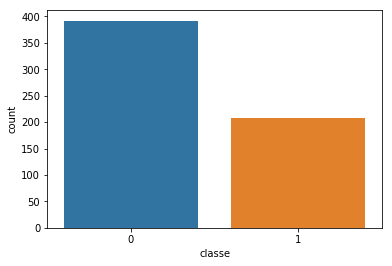

In [3]:
sb.countplot(x='classe',data=dados)

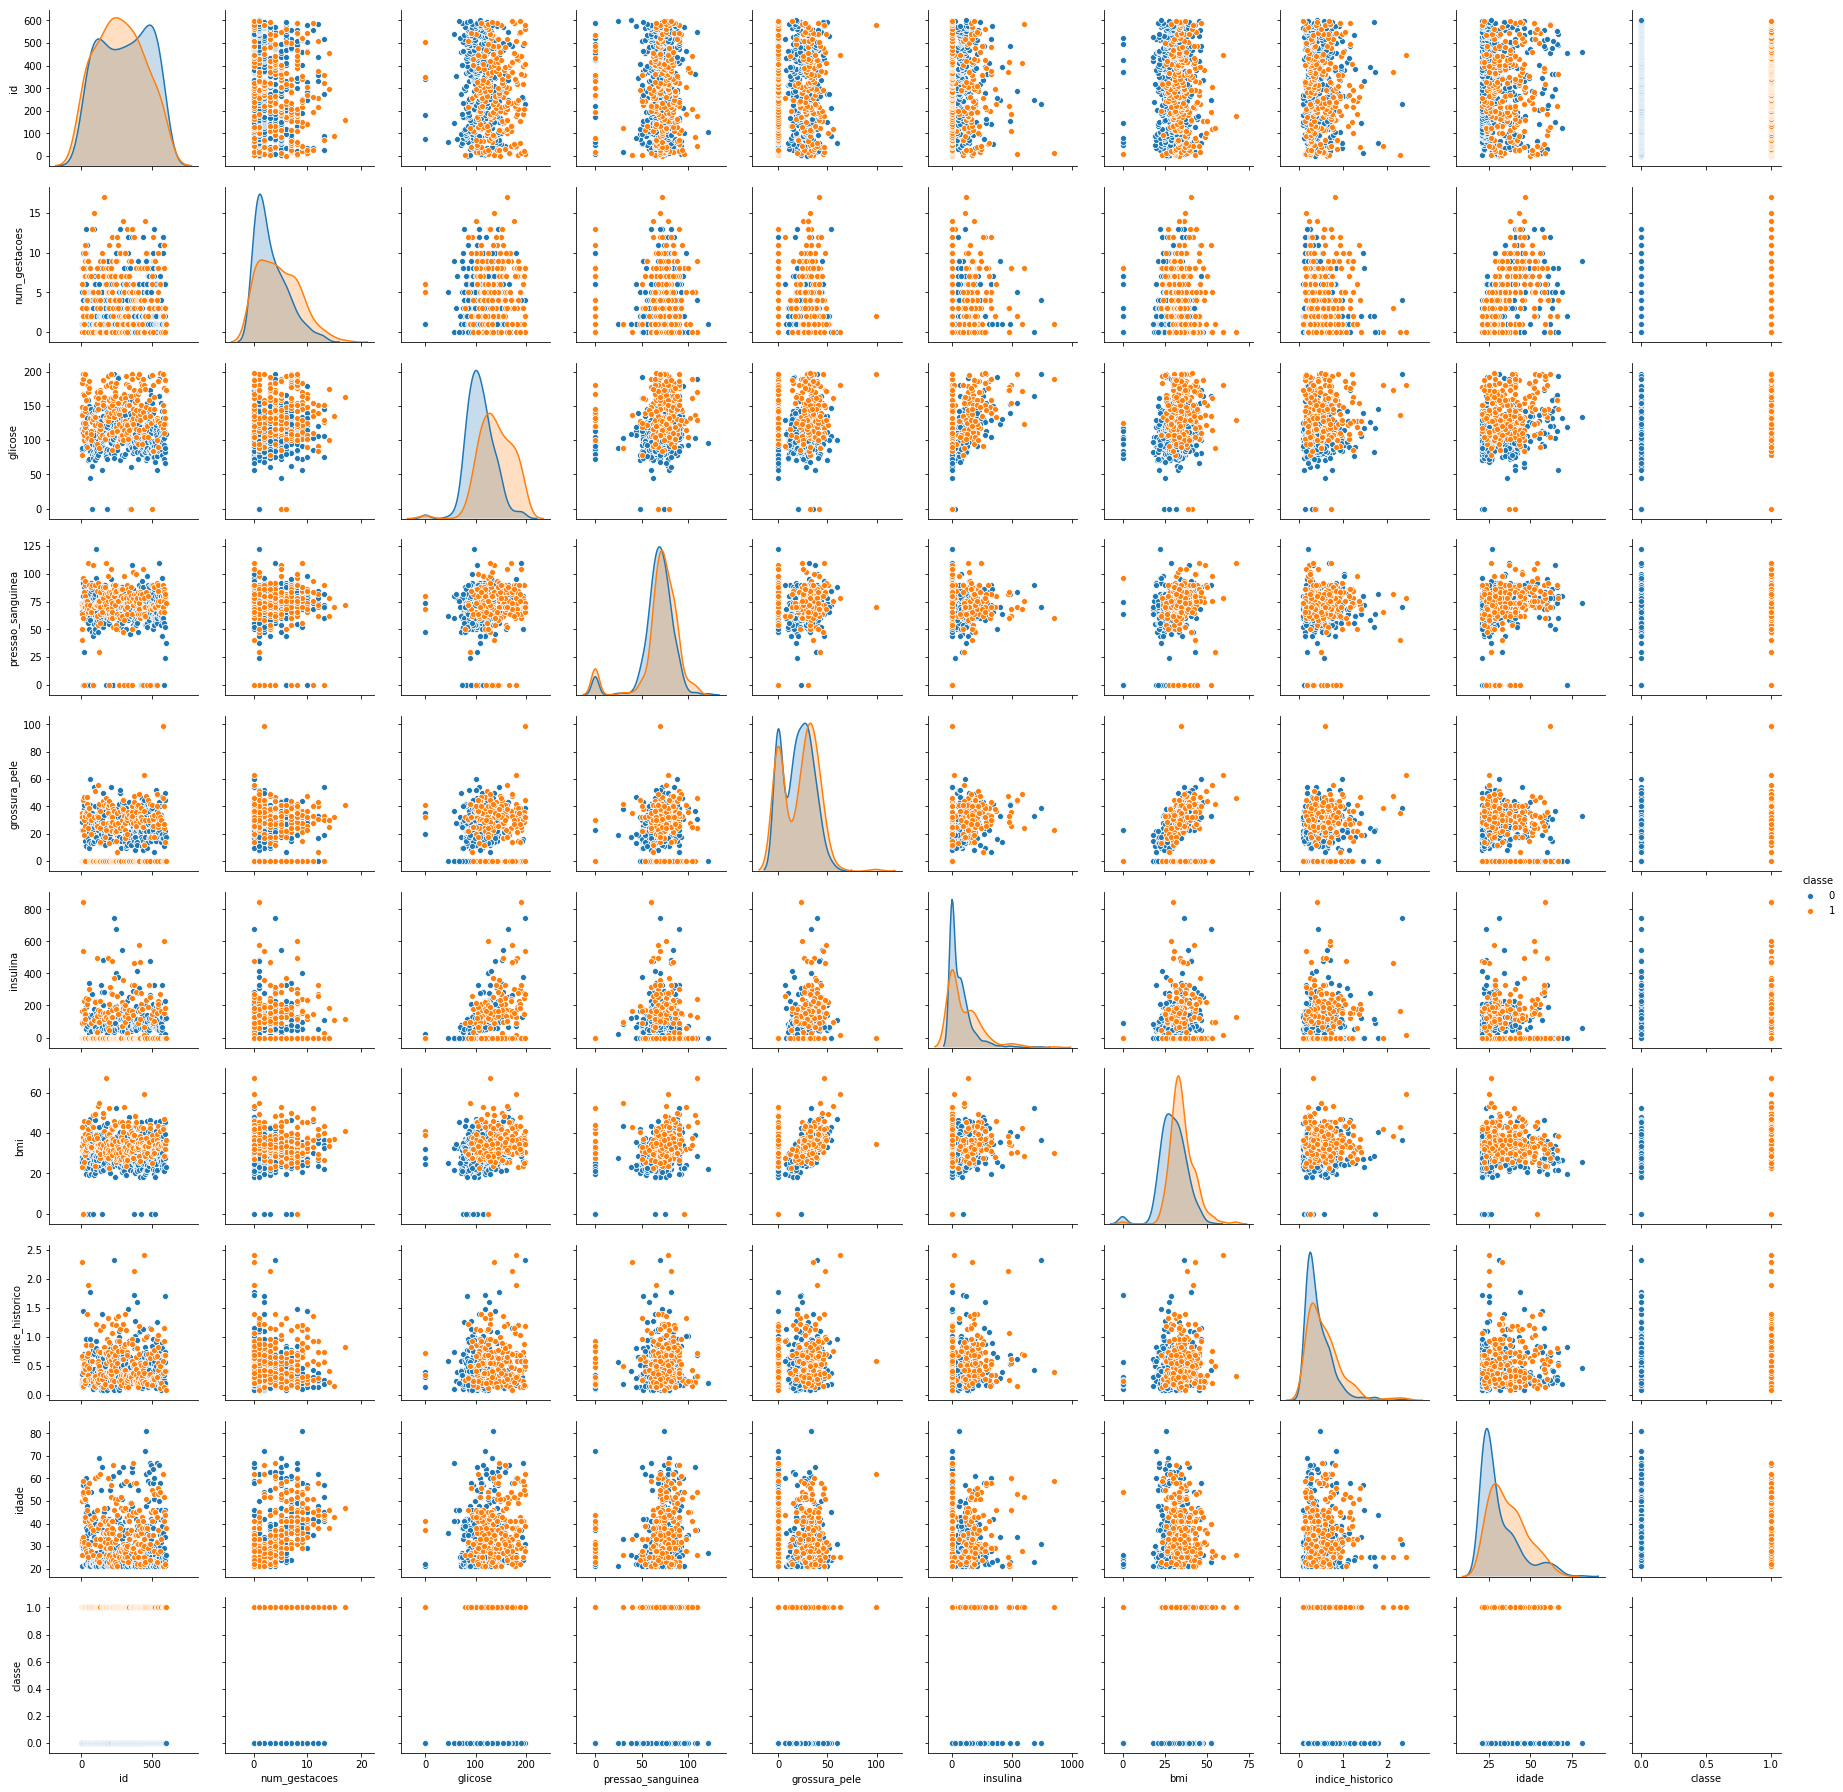

In [4]:
sb.pairplot(data=dados, hue='classe')

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600.0,300.500000,173.349358,1.000,150.750,300.500,450.250,600.00
num_gestacoes,600.0,3.820000,3.362009,0.000,1.000,3.000,6.000,17.00
glicose,600.0,120.135000,32.658246,0.000,99.000,116.000,140.000,198.00
pressao_sanguinea,600.0,68.681667,19.360226,0.000,64.000,70.000,80.000,122.00
grossura_pele,600.0,20.558333,16.004588,0.000,0.000,23.000,32.000,99.00
insulina,600.0,79.528333,116.490583,0.000,0.000,36.500,122.750,846.00
bmi,600.0,31.905333,8.009638,0.000,27.075,32.000,36.525,67.10
indice_historico,600.0,0.481063,0.337284,0.078,0.248,0.384,0.647,2.42
idade,600.0,33.278333,11.822315,21.000,24.000,29.000,40.000,81.00
classe,600.0,0.346667,0.476306,0.000,0.000,0.000,1.000,1.00


In [6]:
dados = dados.drop(columns=['id'])
dados = dados.drop(columns=['grossura_pele']) #identificado corelação com bmi
dados = dados[dados.bmi > 0]
dados = dados[dados.glicose > 0]
dados = dados[dados.pressao_sanguinea > 0]
dados = dados[dados.insulina <= 600]
dados = dados[dados.idade <= 80]
dados = dados[dados.num_gestacoes <= 15]
dados.insulina[dados.insulina == 0] = round(dados.insulina[dados.insulina > 0].mean())

In [7]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
num_gestacoes,559.0,3.824687,3.304396,0.000,1.000,3.000,6.000,15.00
glicose,559.0,120.923077,30.860528,44.000,99.000,116.000,140.000,198.00
pressao_sanguinea,559.0,72.039356,12.281724,24.000,64.000,72.000,80.000,122.00
insulina,559.0,148.758497,78.718595,14.000,110.000,149.000,149.000,600.00
bmi,559.0,32.324150,6.936879,18.200,27.300,32.000,36.500,67.10
indice_historico,559.0,0.479691,0.329703,0.078,0.249,0.385,0.647,2.42
idade,559.0,33.316637,11.677181,21.000,24.000,29.000,40.000,69.00
classe,559.0,0.339893,0.474097,0.000,0.000,0.000,1.000,1.00


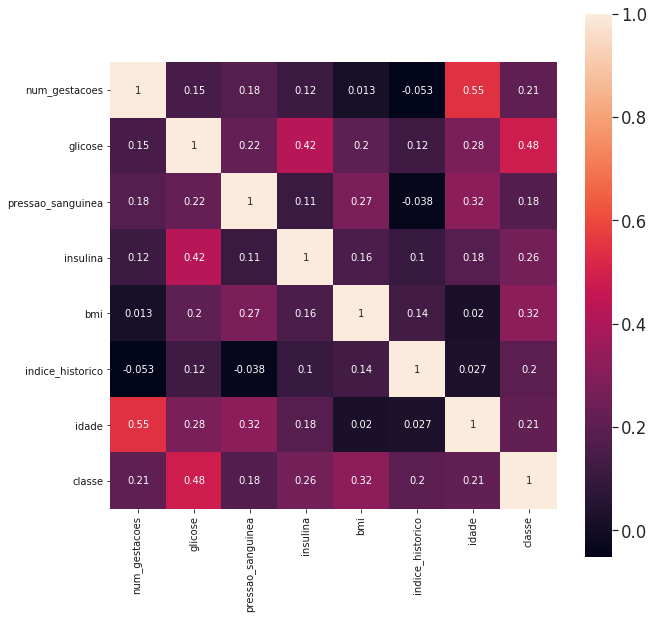

In [8]:
fig = plt.subplots(figsize = (10,10))
sb.set(font_scale=1.5)
sb.heatmap(dados.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dados.drop(columns=['classe']), pd.DataFrame(dados.classe))

In [10]:
y_test.describe().T

,count,mean,std,min,25%,50%,75%,max
classe,140.0,0.385714,0.488511,0.0,0.0,0.0,1.0,1.0


In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
num_gestacoes,419.0,3.694511,3.214388,0.000,1.000,3.000,6.0000,15.00
glicose,419.0,120.000000,30.855660,44.000,97.000,114.000,139.0000,198.00
pressao_sanguinea,419.0,71.887828,12.408683,24.000,64.000,72.000,80.0000,122.00
insulina,419.0,145.918854,78.451174,14.000,106.000,149.000,149.0000,600.00
bmi,419.0,32.315990,7.087050,18.200,27.100,32.000,36.8000,67.10
indice_historico,419.0,0.478000,0.325862,0.078,0.253,0.385,0.6425,2.42
idade,419.0,32.961814,11.551775,21.000,24.000,29.000,39.5000,69.00


In [12]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('Coefficients: \n', lm.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Total True: %d' % lm.predict(X_test).round().sum())

Coefficients: 
 [[ 0.0254645   0.00587451 -0.00066758  0.00021219  0.01533529  0.13295993
   0.0001884 ]]
Mean squared error: 0.17
Variance score: 0.28
Total True: 40


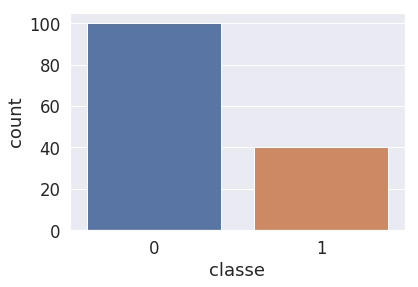

In [13]:
y_test['classe'] = lm.predict(X_test).round()
y_test.classe = y_test.classe.astype(int)
sb.countplot(x='classe',data= y_test)

In [14]:
envio_base = pd.read_csv('../input/dataset_teste.csv')
envio_base.describe().T

,count,mean,std,min,25%,50%,75%,max
id,168.0,84.500000,48.641546,1.0,42.75000,84.5000,126.250,168.000
num_gestacoes,168.0,3.964286,3.441370,0.0,1.00000,3.0000,6.000,13.000
glicose,168.0,124.148810,30.106525,56.0,102.00000,120.0000,142.500,212.000
pressao_sanguinea,168.0,70.619048,19.321673,0.0,62.00000,74.0000,80.500,114.000
grossura_pele,168.0,20.827381,15.577120,0.0,0.00000,23.0000,32.250,49.000
insulina,168.0,104.565476,353.528165,0.0,0.00000,0.0000,136.250,4444.000
bmi,168.0,32.304167,7.433299,0.0,27.67500,32.4000,36.650,57.300
indice_historico,168.0,0.438583,0.308102,0.1,0.22275,0.3415,0.588,1.698
idade,168.0,33.125000,11.565584,21.0,23.75000,28.0000,42.000,70.000


In [15]:
envio = envio_base
envio = envio.drop(columns=['id'])
envio = envio.drop(columns=['grossura_pele'])

envio.bmi[envio.bmi == 0] = round(envio.bmi[(envio.bmi > 0)].mean())
envio.pressao_sanguinea[envio.pressao_sanguinea == 0] = round(envio.pressao_sanguinea[(envio.pressao_sanguinea > 0)].mean())
envio.insulina[envio.insulina == 0] = round(envio.insulina[(envio.insulina > 0) & (envio.insulina < 600)].mean())
envio.insulina[envio.insulina > 600] = round(envio.insulina[(envio.insulina > 0) & (envio.insulina < 600)].mean())

envio.describe().T

,count,mean,std,min,25%,50%,75%,max
num_gestacoes,168.0,3.964286,3.441370,0.0,1.00000,3.0000,6.000,13.000
glicose,168.0,124.148810,30.106525,56.0,102.00000,120.0000,142.500,212.000
pressao_sanguinea,168.0,73.702381,12.458102,44.0,64.00000,74.0000,80.500,114.000
insulina,168.0,160.017857,71.745848,15.0,143.00000,160.0000,160.000,540.000
bmi,168.0,32.697024,6.527385,19.5,27.95000,32.5000,36.650,57.300
indice_historico,168.0,0.438583,0.308102,0.1,0.22275,0.3415,0.588,1.698
idade,168.0,33.125000,11.565584,21.0,23.75000,28.0000,42.000,70.000


,count,mean,std,min,25%,50%,75%,max
id,168.0,84.500000,48.641546,1.0,42.75,84.5,126.25,168.0
classe,168.0,0.285714,0.453104,0.0,0.00,0.0,1.00,1.0


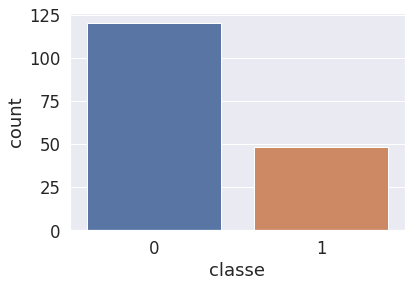

In [16]:
envio_final = pd.DataFrame(envio_base.id)
envio_final['classe'] = lm.predict(envio).round()
envio_final.classe[envio_final.classe < 0.1] = 0
envio_final.classe[envio_final.classe > 0] = 1
envio_final.classe = envio_final.classe.astype(int)
sb.countplot(x='classe',data=envio_final)
envio_final.describe().T

In [17]:
envio_final.to_csv('Submission.csv', index=False)